In [1]:
from numpy  import*
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm,os
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from scipy.integrate import odeint
from scipy import linalg
import time
from numpy.linalg import det, inv, svd, norm
import numpy as np

def Runge_Kutta(to, tEnd, yo, tau, f, p):
          def increment(f, t, y, tau, p):
                    k1=tau*f(t,y, p)
                    k2=tau*f(t+(1/4)*tau,y+(1/4)*k1, p)
                    k3 =tau *f(t+(3/8)*tau,y+(3/32)*k1+(9/32)*k2, p)
                    k4=tau*f(t+(12/13)*tau,y+(1932/2197)*k1-(7200/2197)*k2+(7296/2197)*k3, p)
                    k5=tau*f(t+tau,y+(439/216)*k1-8*k2+(3680/513)*k3 -(845/4104)*k4, p)
                    k6=tau*f(t+(1/2)*tau,y-(8/27)*k1+2*k2-(3544/2565)*k3 +(1859/4104)*k4-(11/40)*k5, p)
                    return (16/135)*k1+(6656/12825)*k3+(28561/56430)*k4-(9/50)*k5+(2/55)*k6ghfhf
          y = [yo]
          while True:
            if tau > 0:
              tau = min(tau, tEnd - to)
            else:
              tau = max(tau, tEnd-to)
            to = to + tau
            if to == tEnd:
              break
            yo = yo + increment(f, to, yo, tau, p)
            y.append(yo)
          return array(y)

def hydra_function(t, y, lambda_):
  #p_ext = 1.013250
  #R = 0.098   # R_a из записей
  #T = 0.8 # взял период в 1 секунду
  #C = 0.08  #c_a
  #I = 4.64    # I_a
  #V0 = 87  #см**3 из записей
  #heart_delta_p = 0.3

  # средняя скорость крови в крупных сосудах(V') = 20см/c

  # граничные условия(сумма масс и Бернулли)
  # сумма масс: выход из одного сосуда равен входу в другой sum(v') = 0    eps-константа для размерности (пока V0 у всех одинаковая, eps=1)
  # eps1 * f[1] + eps2 * f[3] = 0

  # бернулли:
  #q - плотность
  # moment1 =  y[0]**2/2 + p_k/q     # из записей для 2 сосуда
  # moment2 =  y[2]**2/2 + p_k/q     # из записей для 1 сосуда
  # eps1 * moment1 + eps2 * moment2 = 0

  f = np.zeros(4)
  #y[0] = V_1
  #y[1] = V_1'
  #y[2] = V_2
  #y[3] = V_2'

  # пусть первый сосуд - сердце
  #c1 = 0.2
  #c2 = 0.25
  #r1 = 0.25
  #r2 = 0.3
  #I = 0.00003
  #I = 4.64
  p_ext = 0.001
  #T = 2.1
  V0=87



#
  #c1,r1,I,T = [0.47,0.61,0.62,1]
  c1,r1,I,T = [3,lambda_,3,1]


  c2=c1
  r2=r1
  #I2=I1 

#

  #print('a',-r1*T/I*y[1])
  #print('b', -T**2/(c2*I)*y[0])
  #print('c', T**2*p_ext/(I*V0))
  f[0] = y[1]                                                 # первая производная V для 1 сосуда

  f[1] = round(-r1*T/I*y[1] - T**2/(c1*I)*y[0] + T**2*p_ext/(I*V0),100)   # 2 производная V для 1 сосуда

  f[2] = y[3]                                                 # первая производная V для 2 сосуда

  f[3] = round(-r2*T/I*y[3] - T**2/(c2*I)*y[2] + T**2*p_ext/(I*V0),100)   # 2 производная V для 2 сосуда

  #print('y', y)
  #print('f',f)
  return f


def initial_checker_for_hydra(y_all,lambda_):
  left = y_all[0]
  right = y_all[-1]
  eps1 = 1
  eps2 = 0.5
  p_k = 0.1
  q = 0.1
  # eps1 и eps2 - коэффициенты, размера сосуда(чтобы скорость поток считалась одинаково)

  residuals = []


  # ВАЖНО (тут наработки Виты)                                                  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
  #p_ext = lambda_
  p_ext = 0.001


  #c1 =0.2
  #c2=0.25
  s1=265 
  s2=300

  #s1=0.26
  #s2=0.3
  #T=2.1

  #c1 = 0.47
  #r1 = 0.61
  #I = 0.62
  #T = 1

  #c1,r1,I,T = [0.47,0.61,0.62,1]
  c1,r1,I,T = [3,lambda_,3,1]

  c2=c1
  r2=r1


  # Сохранение масс
  #residuals.append(2650*right[1] - 3000*left[3])
  #residuals.append(2650*left[1] - 3000*right[3])

  # Бернулли
  #residuals.append((2650*right[1] / sqrt(2)/T/s1)**2 + right[0]/c1 - (3000*left[3]/sqrt(2)/T/s2)**2 - left[2]/c2)
  #residuals.append((2650*left[1] / sqrt(2)/T/s1)**2 + left[0]/c1 - (3000*right[3]/sqrt(2)/T/s2)**2 - right[2]/c2 - p_ext)


  # Сохранение масс
  residuals.append(right[1] - left[3])
  residuals.append(left[1] - right[3])

  # Бернулли
  residuals.append((right[1] / sqrt(2)/T/s1)**2 + right[0]/c1 - (left[3]/sqrt(2)/T/s2)**2 - left[2]/c2)
  residuals.append((left[1] / sqrt(2)/T/s1)**2 + left[0]/c1 - (right[3]/sqrt(2)/T/s2)**2 - right[2]/c2 - p_ext)


  return np.array(residuals)

In [2]:
graph_nodes = []
Frech_dets = []
eigenvals = []

In [3]:
def drop_parameter(arr, idx):               # временно удаляет один параметр
  #return np.concatenate([arr[:idx], arr[idx + 1:]])
  return np.delete(arr, idx)


In [4]:
def shooting(stepping_param_idx, approx,                                                                     #!!!!!!!!!!!!!   ОТРЕДАЧИТЬ ЭТУ ЯЧЕЙКУ !!!!!!!!!!!!!!!!  сделать p не отдельной переменной, а последним элементом approx
              func,
              left,
              right,
              step,
              bc,
              eps=1e-4):
  steps = 0
  frech_ans = 1e9
  while(True):
        y = np.concatenate((Runge_Kutta((right + left) / 2, left, drop_parameter(approx, len(approx) - 1), -step, func, approx[-1])[::-1],
                             Runge_Kutta((right + left) / 2, right, drop_parameter(approx, len(approx) - 1), step, func, approx[-1])[1:]))
        ys = y
        residuals = bc(y,approx[-1])
        #print(f'residuals {steps}', residuals)
        if (np.abs(residuals) < eps).all():
          #print('max', max(residuals))
          break
        steps += 1
        F = np.zeros((len(approx) - 1, len(approx)))
        #метод Ньютона
        for i in range(len(approx)):
            if i == stepping_param_idx:
              continue
            y_approx = approx.copy()
            y_approx[i] += eps
            y_i = np.concatenate((Runge_Kutta((right + left) / 2, left, drop_parameter(y_approx, len(y_approx) - 1), -step, func, y_approx[-1])[::-1],
                                  Runge_Kutta((right + left) / 2, right, drop_parameter(y_approx, len(y_approx) - 1), step, func, y_approx[-1])[1:]))
            residuals_i = bc(y_i, approx[-1])
            
            F[:, i] = (residuals_i - residuals) / eps

        F = np.delete(F, stepping_param_idx, axis=1)
        frech_ans = np.linalg.det(F)              # определитель Фреше

        if np.linalg.det(F) == 0 or steps >= 6:      # настроил max step 6
            print('определитель матрицы фреше равен 0')
            return False, steps, ys, approx, frech_ans

        res = np.dot(np.linalg.inv(F), residuals)
        res = np.insert(res, stepping_param_idx, 0)
        approx = approx - res

        #for i in range(len(approx)):
        #  approx[params_idxs[i]] -= matrix_step[i]            # без цикла возможно  approx[params_idxs] -= matrix_step     , но надо проверить, что данные изменяется approx

        # конец метода Ньютона

        ys = np.concatenate((Runge_Kutta((right + left) / 2, left, drop_parameter(approx, len(approx) - 1), -step, func, approx[-1])[::-1],
                      Runge_Kutta((right + left) / 2, right, drop_parameter(approx, len(approx) - 1), step, func, approx[-1])[1:]))
        
  if steps>0:
    eigenvals.append(np.linalg.eig(F)[0][-2:])
  else:
    eigenvals.append(np.zeros(2))    
  return True, steps, ys, approx, frech_ans

In [5]:
def parameter_move(stepping_param_idx, approx, step):                 #добавить параметр step, который будет браться из функции parameter_change (он не обязательно положительный и не обязательно большой)                                         #!!!!!!!!!!!!!   ОТРЕДАЧИТЬ ЭТУ ЯЧЕЙКУ !!!!!!!!!!!!!!!!  сделать p по индексу а не по значению
  previous_approximation = np.zeros(approx.shape)
  last_approximation = np.zeros(approx.shape)
  #print('last', last_approximation)
  # начальный параметр(например давление) p
  
  #approx[stepping_param_idx] -= step
  steps_streak=0
  max_steps_streak=0
  is_inf = False
  first_step=True 
  
  while abs(step) > 1e-3:

    print('step', step)
    print('shoot', approx[stepping_param_idx] + step)

    approx_try = approx.copy()                                  #пробуем увеличить approx, если Ньютон не сойдется, то вернем обратно
    approx_try[stepping_param_idx] += step

    shoot = shooting(stepping_param_idx, approx = approx_try,
                     func = hydra_function, left = 0, right = 1,
                     step = 0.01,
                     bc = initial_checker_for_hydra)      # метод пристрелки
    print(shoot[0], shoot[1], shoot[3], '\n')

    #if steps_streak > 20 and step > 5:
    #  is_inf = True
    #  break

    if shoot[0]:    # если не критическая точка
      #if shoot[1] < 3 and step < 0.05:
      #if step < 0.05:
      step *= 1.2

      steps_streak += 1
      previous_approximation = last_approximation
      approx = shoot[3]
      graph_nodes.append(approx)
      Frech_dets.append(shoot[4])
      last_approximation = approx

    else:
      step /= 2
      steps_streak = 0

  if not is_inf:
    print('предельная точка', approx[stepping_param_idx])

  #is_inf - уходим ли мы в бесконечность

  return stepping_param_idx , np.array(last_approximation - previous_approximation), is_inf, approx

In [6]:
def parameter_change(stepping_param_idx, diff, approx):                                                            #!!!!!!!!!!!!!   ОТРЕДАЧИТЬ ЭТУ ЯЧЕЙКУ !!!!!!!!!!!!!!!!  сделать p по индексу а не по значению
  # diff - массив разностей параметров на последнем шаге
  #print('diff')
  #print(stepping_param_idx)
    #max_idx = np.argmax(drop_parameter(diff, stepping_param_idx))
  max_idx=0
  max1=0
  for i in range(len(diff)):
    if i != stepping_param_idx and abs(diff[i]) > max1:
      max1 = abs(diff[i])
      max_idx = i
  print('diff', diff)
  stepping_param_idx = max_idx
  print('new param', stepping_param_idx)
  new_step = sign(diff[max_idx])*0.01
  print('new_step', new_step)
  return stepping_param_idx, new_step
  # выбирать максимальны быстрорастущий, если хотим просто строить, или выбирать все по очереди, если хотим построить все ветви (рекурсия)

In [7]:
def branches_search(stepping_param_idx, approx):
  step = 0.01
  while 1 == 1:
    stepping_param_idx, diff, is_inf, approx = parameter_move(stepping_param_idx, approx, step)
    if is_inf:
      break
    print('Смена параметра')
    stepping_param_idx, step = parameter_change(stepping_param_idx, diff, approx)
    print('approx', approx)
    # branches_search(p, approx) если строим рекурсивно все ветви

In [8]:
approx = np.zeros(5)
#approx[0] = 0.84740926
#approx[1] = -1.28941452
approx[4] = 0.6
#
branches_search(len(approx) - 1, approx)

step 0.01
shoot 0.61


NameError: ignored

In [ ]:
graph_nodes = np.array(graph_nodes)
plt.plot(graph_nodes[:,0], graph_nodes[:,-1])
plt.xlabel('u')
plt.ylabel('lambda')
plt.show()


In [ ]:
Frech_dets = np.array(Frech_dets)
plt.plot(graph_nodes[:,-1], Frech_dets)
plt.xlabel('lambda')
plt.ylabel('Frech_det')

In [ ]:
Frech_dets = np.array(Frech_dets)
plt.plot(graph_nodes[:,0], Frech_dets)
plt.xlabel('u')
plt.ylabel('Freche det')

In [ ]:
Frech_dets

array([-2.20756734e+01,  1.00000000e+09,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09, -2.62565083e+01,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09, -3.24794780e+01,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09,  1.00000000e+09,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09, -4.20246734e+01,  1.00000000e+09,  1.00000000e+09,
        1.00000000e+09,  

In [ ]:
eigenvals = np.array(eigenvals)

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


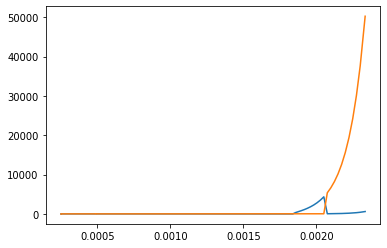

In [ ]:
plt.plot(graph_nodes[:,0], eigenvals[:,0])
plt.plot(graph_nodes[:,0], eigenvals[:,1])

(5001, 2)

In [ ]:
eigenvals

array([[-9.21638740e-01  -2.39681867j, -1.88681265e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
       [ 0.00000000e+00  +0.j        ,  0.00000000e+00  +0.j        ],
      

In [ ]:
c1,r1,I,T = [0.47,0.61,0.62,1]
print((4*I/c1)**2)
print(r1)

27.84246265278407
0.61
